# Key Points about SVM (Support Vector Machines)

## 1. What is SVM?
- SVM is a powerful supervised machine learning algorithm used for both **classification** and **regression** problems, but it is mainly known for classification tasks.

## 2. How SVM Works:
- SVM finds the **optimal hyperplane** that maximizes the margin between different classes in the dataset.
- The data points closest to the hyperplane are called **support vectors**, and they play a crucial role in defining the decision boundary.

## 3. Kernel Trick:
- SVM can handle **non-linear classification** problems using the **kernel trick**. Common kernels include:
  - **Linear Kernel**
  - **Polynomial Kernel**
  - **RBF (Radial Basis Function) Kernel**
  - **Sigmoid Kernel**

## 4. Advantages of SVM:
- Works well with high-dimensional data.
- Effective for datasets with a clear margin of separation.
- Robust to overfitting, especially in high-dimensional spaces.

## 5. Limitations of SVM:
- Can be computationally expensive for large datasets.
- Choosing the right kernel and tuning hyperparameters (e.g., `C` and `gamma`) is crucial and may require trial and error.
- Not very effective when there is significant overlap between classes.

## 6. Evaluation Metrics:
- For classification tasks, SVM can be evaluated using metrics like:
  - **Accuracy**
  - **Precision**
  - **Recall**
  - **F1-Score**
  - **ROC-AUC Curve**

## 7. Applications of SVM:
- Text classification (e.g., spam detection, sentiment analysis).
- Image recognition (e.g., handwriting recognition).
- Medical diagnosis (e.g., cancer detection).
- Bioinformatics (e.g., protein classification).

## 8. When to Use SVM:
- When you have a **small to medium-sized dataset**.
- When the dataset is **linearly separable** or can be transformed into a separable form using kernels.
- When interpretability of the decision boundary is important.

## 9. Hyperparameters to Tune:
- **C (Regularization Parameter):** Controls the trade-off between achieving a low error on the training data and minimizing the margin.
- **Kernel Type:** Specifies the transformation method for non-linear problems.
- **Gamma (for RBF Kernel):** Determines the influence of a single training example.

## 10. SVM vs Other Algorithms:
- SVM is a good choice for small datasets with high feature dimensions but might be outperformed by algorithms like Random Forest or Gradient Boosting for larger datasets with complex relationships.

---

## Conclusion
Support Vector Machines are a versatile and robust algorithm for classification and regression problems. While they may require careful hyperparameter tuning and are computationally intensive for large datasets, their ability to handle high-dimensional data and provide clear decision boundaries makes them a valuable tool in a data scientist's arsenal.

In [42]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ml libraries
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report 
from sklearn.preprocessing import LabelEncoder

In [43]:
# import dataset of iris 
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [44]:
# lets make X and y
X = df.drop('species' , axis=1)
y = df['species']

In [45]:
# train test split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

In [46]:
# make model
model = SVC()
model.fit(X_train , y_train)

# predict
y_pred = model.predict(X_test)

In [47]:
# evaluate model
print(confusion_matrix(y_test , y_pred))
print(classification_report(y_test , y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



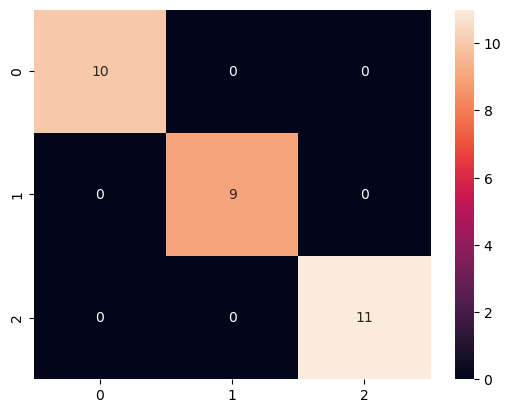

In [48]:
# draw the confusion matrix
sns.heatmap(confusion_matrix(y_test , y_pred) , annot=True ,fmt='d')
plt.show()

# SVR (Support Vector Regression) 

In [49]:
# now we will use SVR
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score , mean_squared_error, mean_absolute_error, precision_score
from sklearn.preprocessing import LabelEncoder , OneHotEncoder ,StandardScaler

# load numerical dataset from sns
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
# make X and y
X = df.drop('total_bill' , axis=1)
y = df['total_bill']

#  lets encode categorical columns
label_encoder = LabelEncoder()
for col in ['sex' , 'smoker' , 'day' , 'time']:
    X[col] = label_encoder.fit_transform(X[col])


# train test split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)

# make model
model = SVR()
model.fit(X_train , y_train)

# predict
y_pred = model.predict(X_test)

# evaluate model 
# print with f string
print(f"Mean Squared Error: {mean_squared_error(y_test , y_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test , y_pred))}")   
print(f"R2 Score: {r2_score(y_test , y_pred)}")



Mean Squared Error: 38.926776636905196
Root Mean Squared Error: 6.239132683066228
R2 Score: 0.5408957999745818
